In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
S_p = []
S_p_2 = []
f = 0.02
S_p.append(0.0)
for n in range(24):
    S_p.append(1/((f)+((1-f)/(n+1))))
    S_p_2.append(f + (1-f) * n)

In [3]:
with open('GEMM_output_TBB_size1_2000_size2_2000_strong.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    p_count = []
    times = []
    reductions_tbb = []
    eff_tbb = []
    for i, row in enumerate(csv_reader):
        if i != 0:
            times.append(float(row[4])) 
            p_count.append(int(row[1])) 
    for i, time in enumerate(times):
        reductions_tbb.append(times[0]/time)
        eff_tbb.append(times[0]/(time* (i+1)))
    #plt.plot(p_count, reductions_tbb, label = "TBB")

In [4]:
with open('GEMM_output_OMP_size1_2000_size2_2000_strong.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    p_count = []
    times = []
    reductions_omp = []
    eff_omp = []
    for i, row in enumerate(csv_reader):
        if i != 0:
            times.append(float(row[4])) 
            p_count.append(int(row[1])) 
    for i, time in enumerate(times):
        reductions_omp.append(times[0]/time)
        eff_omp.append(times[0]/(time* (i+1)))
    #plt.plot(p_count, reductions_omp, label = "OMP")

In [5]:
with open('GEMM_output_THR_size1_2000_size2_2000_strong.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    p_count = []
    times = []
    reductions_thr = []
    eff_thr=[]
    for i, row in enumerate(csv_reader):
        if i != 0:
            times.append(float(row[4])) 
            p_count.append(int(row[1])) 
    for i, time in enumerate(times):
        reductions_thr.append(times[0]/time)
        eff_thr.append(times[0]/(time* (i+1)))
    #plt.plot(p_count, reductions_thr, label = "std thread")

In [6]:
with open('GEMM_output_EXC_size1_2000_size2_2000_strong.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    p_count = []
    times = []
    reductions_cpp = []
    eff_cpp= []
    for i, row in enumerate(csv_reader):
        if i != 0:
            times.append(float(row[4])) 
            p_count.append(int(row[1])) 
    for i, time in enumerate(times):
        reductions_cpp.append(times[0]/time)
        eff_cpp.append(times[0]/(time* (i+1)))
    #plt.plot(p_count, reductions_cpp, label="c++ execution")

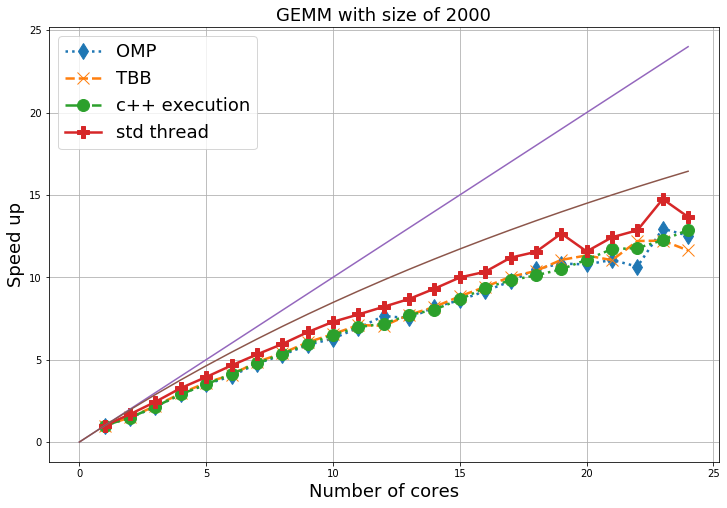

In [7]:
plt.figure(figsize = (12, 8))
ax = plt.subplot(111)
plt.plot(p_count, reductions_omp,'d:', linewidth = 2.5, label = "OMP", markersize = 12)
plt.plot(p_count, reductions_tbb, 'x--',  linewidth = 2.5, label = "TBB", markersize = 12)
plt.plot(p_count, reductions_cpp, 'o-.', linewidth = 2.5, label="c++ execution", markersize = 12)
plt.plot(p_count, reductions_thr, 'P-', linewidth = 2.5, label = "std thread", markersize = 12)
plt.grid()
plt.title("GEMM with size of 2000", fontsize = 18)
plt.xlabel("Number of cores", fontsize = 18)
plt.ylabel("Speed up", fontsize = 18)
plt.legend(fontsize =18)
plt.plot([0, 24],[0, 24])
plt.plot(S_p)
plt.savefig("GEMM_speed_up.jpg")

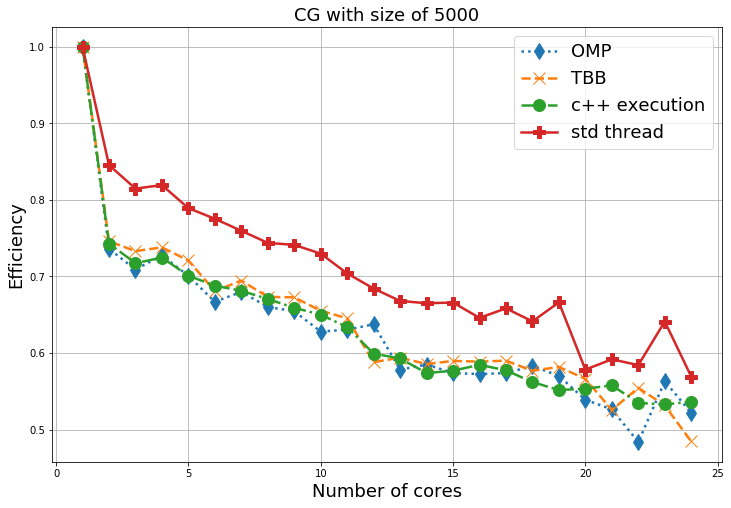

In [8]:
plt.figure(figsize = (12, 8))
ax = plt.subplot(111)
plt.plot(p_count, eff_omp,'d:', linewidth = 2.5, label = "OMP", markersize = 12)
plt.plot(p_count, eff_tbb, 'x--',  linewidth = 2.5, label = "TBB", markersize = 12)
plt.plot(p_count, eff_cpp, 'o-.', linewidth = 2.5, label="c++ execution", markersize = 12)
plt.plot(p_count, eff_thr, 'P-', linewidth = 2.5, label = "std thread", markersize = 12)
plt.grid()
plt.title("CG with size of 5000", fontsize = 18)
plt.xlabel("Number of cores", fontsize = 18)
plt.ylabel("Efficiency", fontsize = 18)
plt.legend(fontsize =18)
plt.savefig("GEMM_efficiencies.jpg")